# Group: Ivan, Ravi, Tony C

In [1]:
import os

import pandas as pd
pd.set_option('display.max_rows', 40)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 40)

from datetime import datetime

from sklearn import preprocessing, neighbors, grid_search, cross_validation

from sklearn import linear_model, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [158]:
df = pd.read_csv('http://localhost:8888/files/Classwork/dataset-12-walget-train.csv')

# Exploratory Analysis

In [5]:
df.head(10)

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Male,Apartment,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False
2,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,Male,Apartment,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,Female,Home,False,True,False,False,False,False,False,False,False,NaN,False,False,False,True,False,False
8,Female,Apartment,False,False,False,False,False,False,False,False,NaN,False,True,False,True,False,False,False
9,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.count()

AccountHolderImpliedGender                              542
AccountHolderAddress                                    594
RecentlyPurchasedPregnancyTest                          594
RecentlyPurchasedBirthControl                           593
RecentlyPurchasedFeminineHygieneProducts                590
RecentlyPurchasedFolicAcidSupplements                   599
RecentlyPurchasedPrenatalVitamins                       594
RecentlyPurchasedPrenatalYogaDVD                        594
RecentlyPurchasedBodyPillow                             591
RecentlyPurchasedGingerAle                              594
RecentlyPurchasedSeaBands                               589
PurchasedCigarettesRegularlyUntilRecentlyThenStopped    595
RecentlyPurchasedCigarettes                             591
RecentlyPurchasedSmokingCessationProducts               588
PurchasedWineRegularlyUntilRecentlyThenStopped          588
RecentlyPurchasedWine                                   592
RecentlyPurchasedMaternityClothing      

In [9]:
df.describe

<bound method DataFrame.describe of     AccountHolderImpliedGender AccountHolderAddress  \
0                       Female            Apartment   
1                         Male            Apartment   
2                         Male            Apartment   
3                         Male            Apartment   
4                         Male            Apartment   
5                         Male            Apartment   
6                         Male            Apartment   
7                       Female                 Home   
8                       Female            Apartment   
9                         Male            Apartment   
10                        Male                 Home   
11                        Male                 Home   
12                      Female            Apartment   
13                        Male            Apartment   
14                        Male                 Home   
15                        Male            Apartment   
16                      Femal

In [10]:
df.dtypes

AccountHolderImpliedGender                              object
AccountHolderAddress                                    object
RecentlyPurchasedPregnancyTest                          object
RecentlyPurchasedBirthControl                           object
RecentlyPurchasedFeminineHygieneProducts                object
RecentlyPurchasedFolicAcidSupplements                   object
RecentlyPurchasedPrenatalVitamins                       object
RecentlyPurchasedPrenatalYogaDVD                        object
RecentlyPurchasedBodyPillow                             object
RecentlyPurchasedGingerAle                              object
RecentlyPurchasedSeaBands                               object
PurchasedCigarettesRegularlyUntilRecentlyThenStopped    object
RecentlyPurchasedCigarettes                             object
RecentlyPurchasedSmokingCessationProducts               object
PurchasedWineRegularlyUntilRecentlyThenStopped          object
RecentlyPurchasedWine                                  

In [25]:
df.isnull()

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

AccountHolderImpliedGender                              58
AccountHolderAddress                                     6
RecentlyPurchasedPregnancyTest                           6
RecentlyPurchasedBirthControl                            7
RecentlyPurchasedFeminineHygieneProducts                10
RecentlyPurchasedFolicAcidSupplements                    1
RecentlyPurchasedPrenatalVitamins                        6
RecentlyPurchasedPrenatalYogaDVD                         6
RecentlyPurchasedBodyPillow                              9
RecentlyPurchasedGingerAle                               6
RecentlyPurchasedSeaBands                               11
PurchasedCigarettesRegularlyUntilRecentlyThenStopped     5
RecentlyPurchasedCigarettes                              9
RecentlyPurchasedSmokingCessationProducts               12
PurchasedWineRegularlyUntilRecentlyThenStopped          12
RecentlyPurchasedWine                                    8
RecentlyPurchasedMaternityClothing                      

In [160]:
list(df)

['AccountHolderImpliedGender',
 'AccountHolderAddress',
 'RecentlyPurchasedPregnancyTest',
 'RecentlyPurchasedBirthControl',
 'RecentlyPurchasedFeminineHygieneProducts',
 'RecentlyPurchasedFolicAcidSupplements',
 'RecentlyPurchasedPrenatalVitamins',
 'RecentlyPurchasedPrenatalYogaDVD',
 'RecentlyPurchasedBodyPillow',
 'RecentlyPurchasedGingerAle',
 'RecentlyPurchasedSeaBands',
 'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedCigarettes',
 'RecentlyPurchasedSmokingCessationProducts',
 'PurchasedWineRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedWine',
 'RecentlyPurchasedMaternityClothing',
 'IsPregnant']

In [105]:
df.shape

(600, 18)

# Splitting Dataset 70/30

In [34]:
test_df = df.sample(frac = .3, random_state = 0)
train_df = df.drop(train_df.index)

In [37]:
train_df.shape

(360, 18)

In [39]:
train_df.dropna(inplace = 'TRUE')

In [40]:
train_df.shape

(267, 18)

In [41]:
train_df

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Male,Apartment,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False
2,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Male,Apartment,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,Male,Home,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
14,Male,Home,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17,Female,Home,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18,Female,Apartment,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False


# Create Dummies for Train

In [98]:
df_cat = train_df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
df_dum = pd.get_dummies(df_cat)
df_dum

,IsPregnant,AccountHolderImpliedGender_Female,AccountHolderImpliedGender_Male,AccountHolderAddress_Apartment,AccountHolderAddress_Home,AccountHolderAddress_PO Box,RecentlyPurchasedPregnancyTest_False,RecentlyPurchasedPregnancyTest_True,RecentlyPurchasedBirthControl_False,RecentlyPurchasedBirthControl_True,RecentlyPurchasedFeminineHygieneProducts_False,RecentlyPurchasedFeminineHygieneProducts_True,RecentlyPurchasedFolicAcidSupplements_False,RecentlyPurchasedFolicAcidSupplements_True,RecentlyPurchasedPrenatalVitamins_False,RecentlyPurchasedPrenatalVitamins_True,RecentlyPurchasedPrenatalYogaDVD_False,RecentlyPurchasedPrenatalYogaDVD_True,RecentlyPurchasedBodyPillow_False,RecentlyPurchasedBodyPillow_True,RecentlyPurchasedGingerAle_False,RecentlyPurchasedGingerAle_True,RecentlyPurchasedSeaBands_False,RecentlyPurchasedSeaBands_True,PurchasedCigarettesRegularlyUntilRecentlyThenStopped_False,PurchasedCigarettesRegularlyUntilRecentlyThenStopped_True,RecentlyPurchasedCigarettes_False,RecentlyPurchasedCigarettes_True,RecentlyPurchasedSmokingCessationProducts_False,RecentlyPurchasedSmokingCessationProducts_True,PurchasedWineRegularlyUntilRecentlyThenStopped_False,PurchasedWineRegularlyUntilRecentlyThenStopped_True,RecentlyPurchasedWine_False,RecentlyPurchasedWine_True,RecentlyPurchasedMaternityClothing_False,RecentlyPurchasedMaternityClothing_True
0,False,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
10,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
14,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
17,False,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
18,False,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [92]:
train_df.head(10)

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Male,Apartment,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False
2,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Male,Apartment,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,Male,Home,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
14,Male,Home,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17,Female,Home,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18,Female,Apartment,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False


# Correlation Matrix to Guide Variable Selection

In [96]:
df_dum_subset= df_dum[['RecentlyPurchasedFolicAcidSupplements_True', 'RecentlyPurchasedPrenatalVitamins_True', 'RecentlyPurchasedBirthControl_False']]
df_dum_subset.corr()

,RecentlyPurchasedFolicAcidSupplements_True,RecentlyPurchasedPrenatalVitamins_True,RecentlyPurchasedBirthControl_False
RecentlyPurchasedFolicAcidSupplements_True,1.000000,0.036080,0.097744
RecentlyPurchasedPrenatalVitamins_True,0.036080,1.000000,0.096086
RecentlyPurchasedBirthControl_False,0.097744,0.096086,1.000000


In [99]:
df_dum.corr().IsPregnant

IsPregnant                                                    1.000000
AccountHolderImpliedGender_Female                             0.134631
AccountHolderImpliedGender_Male                              -0.134631
AccountHolderAddress_Apartment                               -0.011368
AccountHolderAddress_Home                                     0.011400
AccountHolderAddress_PO Box                                  -0.000386
RecentlyPurchasedPregnancyTest_False                         -0.233028
RecentlyPurchasedPregnancyTest_True                           0.233028
RecentlyPurchasedBirthControl_False                           0.338376
RecentlyPurchasedBirthControl_True                           -0.338376
RecentlyPurchasedFeminineHygieneProducts_False                0.290395
RecentlyPurchasedFeminineHygieneProducts_True                -0.290395
RecentlyPurchasedFolicAcidSupplements_False                  -0.347794
RecentlyPurchasedFolicAcidSupplements_True                    0.347794
Recent

In [71]:
ar = df_dum.corr().IsPregnant

In [72]:
train_df_corr_preg = df_dum.corr().IsPregnant

In [162]:
train_df_corr = df_dum.corr()

# Data Visualization: Heatmap

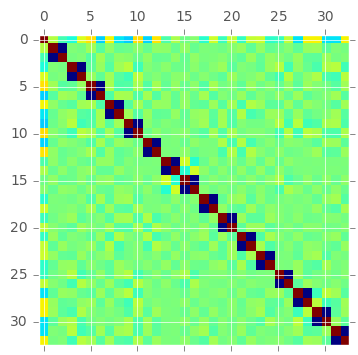

In [76]:
plt.matshow(train_df_corr)

In [106]:
ar.abs().sort_values()

RecentlyPurchasedBodyPillow_True                              0.031168
RecentlyPurchasedBodyPillow_False                             0.031168
RecentlyPurchasedPrenatalYogaDVD_False                        0.110536
RecentlyPurchasedPrenatalYogaDVD_True                         0.110536
AccountHolderImpliedGender_Male                               0.134631
AccountHolderImpliedGender_Female                             0.134631
RecentlyPurchasedSeaBands_False                               0.161197
RecentlyPurchasedSeaBands_True                                0.161197
RecentlyPurchasedSmokingCessationProducts_True                0.168310
RecentlyPurchasedSmokingCessationProducts_False               0.168310
PurchasedCigarettesRegularlyUntilRecentlyThenStopped_False    0.178499
PurchasedCigarettesRegularlyUntilRecentlyThenStopped_True     0.178499
RecentlyPurchasedCigarettes_True                              0.190463
RecentlyPurchasedCigarettes_False                             0.190463
Recent

In [117]:
df_dum

,IsPregnant,AccountHolderImpliedGender_Female,AccountHolderImpliedGender_Male,AccountHolderAddress_Apartment,AccountHolderAddress_Home,AccountHolderAddress_PO Box,RecentlyPurchasedPregnancyTest_False,RecentlyPurchasedPregnancyTest_True,RecentlyPurchasedBirthControl_False,RecentlyPurchasedBirthControl_True,RecentlyPurchasedFeminineHygieneProducts_False,RecentlyPurchasedFeminineHygieneProducts_True,RecentlyPurchasedFolicAcidSupplements_False,RecentlyPurchasedFolicAcidSupplements_True,RecentlyPurchasedPrenatalVitamins_False,RecentlyPurchasedPrenatalVitamins_True,RecentlyPurchasedPrenatalYogaDVD_False,RecentlyPurchasedPrenatalYogaDVD_True,RecentlyPurchasedBodyPillow_False,RecentlyPurchasedBodyPillow_True,RecentlyPurchasedGingerAle_False,RecentlyPurchasedGingerAle_True,RecentlyPurchasedSeaBands_False,RecentlyPurchasedSeaBands_True,PurchasedCigarettesRegularlyUntilRecentlyThenStopped_False,PurchasedCigarettesRegularlyUntilRecentlyThenStopped_True,RecentlyPurchasedCigarettes_False,RecentlyPurchasedCigarettes_True,RecentlyPurchasedSmokingCessationProducts_False,RecentlyPurchasedSmokingCessationProducts_True,PurchasedWineRegularlyUntilRecentlyThenStopped_False,PurchasedWineRegularlyUntilRecentlyThenStopped_True,RecentlyPurchasedWine_False,RecentlyPurchasedWine_True,RecentlyPurchasedMaternityClothing_False,RecentlyPurchasedMaternityClothing_True
0,False,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
10,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
14,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
17,False,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
18,False,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# Define Params for Logistic Regression Model

In [139]:
names_X = ['RecentlyPurchasedFolicAcidSupplements_True', 'RecentlyPurchasedPrenatalVitamins_True', 'RecentlyPurchasedBirthControl_False', 'PurchasedWineRegularlyUntilRecentlyThenStopped_True', 'RecentlyPurchasedWine_False', 'RecentlyPurchasedFeminineHygieneProducts_True', 'RecentlyPurchasedMaternityClothing_True']

def X_c(df_dum):
    X = df_dum[ names_X ]
    c = df_dum.IsPregnant
    return X, c

train_X1, train_c = X_c(df_dum)
test_X, test_c = X_c(test_df)

# Run Model 1

In [140]:
from sklearn import linear_model, cross_validation

model_1 = linear_model.LogisticRegression().\
    fit(train_X1, train_c)

print model.intercept_
print model.coef_

[-2.71268538]
[[ 2.24356913  1.89382043  1.44760901  1.67250708  1.10795282 -1.60615477
   1.4744987 ]]


# Gauge Accuracy of Model 1

In [141]:
model_1.score(train_X1, train_c)

0.8089887640449438

# Compare Results to Model 2 With Fewer Variables

In [142]:
names_X = ['RecentlyPurchasedFolicAcidSupplements_True', 'RecentlyPurchasedBirthControl_False']

def X_c(df_dum):
    X = df_dum[ names_X ]
    c = df_dum.IsPregnant
    return X, c

train_X2, train_c = X_c(df_dum)
#test_X, test_c = X_c(test_df)

In [143]:
from sklearn import linear_model, cross_validation

model_2 = linear_model.LogisticRegression().\
    fit(train_X2, train_c)

print model.intercept_
print model.coef_

[-2.71268538]
[[ 2.24356913  1.89382043  1.44760901  1.67250708  1.10795282 -1.60615477
   1.4744987 ]]


In [145]:
model_2.score(train_X2, train_c)

0.6292134831460674

# Log Odds Plot of Model 1 & 2

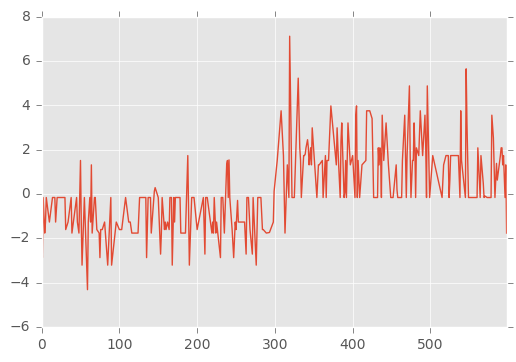

In [148]:
logit_hat_preg = model_1.intercept_ + \
    (train_X1 * model_1.coef_[0]).sum(axis = 1)

logit_hat_preg.plot()

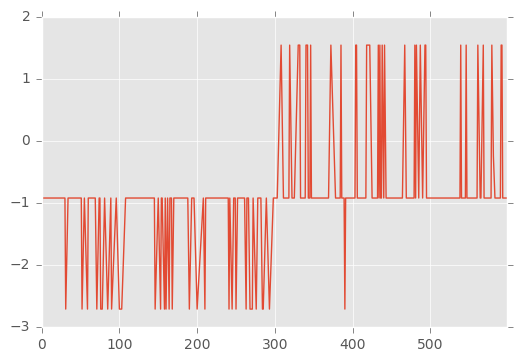

In [150]:
logit_hat_preg = model.intercept_ + \
    (train_X2 * model_2.coef_[0]).sum(axis = 1)

logit_hat_preg.plot()

# Building Test Dataset

In [152]:
df_cat_test = test_df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
df_dum_test = pd.get_dummies(df_cat_test)
df_dum_test

,IsPregnant,AccountHolderImpliedGender_Female,AccountHolderImpliedGender_Male,AccountHolderAddress_Apartment,AccountHolderAddress_Home,AccountHolderAddress_PO Box,RecentlyPurchasedPregnancyTest_False,RecentlyPurchasedPregnancyTest_True,RecentlyPurchasedBirthControl_False,RecentlyPurchasedBirthControl_True,RecentlyPurchasedFeminineHygieneProducts_False,RecentlyPurchasedFeminineHygieneProducts_True,RecentlyPurchasedFolicAcidSupplements_False,RecentlyPurchasedFolicAcidSupplements_True,RecentlyPurchasedPrenatalVitamins_False,RecentlyPurchasedPrenatalVitamins_True,RecentlyPurchasedPrenatalYogaDVD_False,RecentlyPurchasedPrenatalYogaDVD_True,RecentlyPurchasedBodyPillow_False,RecentlyPurchasedBodyPillow_True,RecentlyPurchasedGingerAle_False,RecentlyPurchasedGingerAle_True,RecentlyPurchasedSeaBands_False,RecentlyPurchasedSeaBands_True,PurchasedCigarettesRegularlyUntilRecentlyThenStopped_False,PurchasedCigarettesRegularlyUntilRecentlyThenStopped_True,RecentlyPurchasedCigarettes_False,RecentlyPurchasedCigarettes_True,RecentlyPurchasedSmokingCessationProducts_False,RecentlyPurchasedSmokingCessationProducts_True,PurchasedWineRegularlyUntilRecentlyThenStopped_False,PurchasedWineRegularlyUntilRecentlyThenStopped_True,RecentlyPurchasedWine_False,RecentlyPurchasedWine_True,RecentlyPurchasedMaternityClothing_False,RecentlyPurchasedMaternityClothing_True
434,True,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
122,False,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
224,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
479,True,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
205,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
569,True,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
432,True,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
526,True,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
439,True,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
162,False,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# Scoring Model 1 on Test and Train Data

In [157]:
names_X = ['RecentlyPurchasedFolicAcidSupplements_True', 'RecentlyPurchasedPrenatalVitamins_True', 'RecentlyPurchasedBirthControl_False', 'PurchasedWineRegularlyUntilRecentlyThenStopped_True', 'RecentlyPurchasedWine_False', 'RecentlyPurchasedFeminineHygieneProducts_True', 'RecentlyPurchasedMaternityClothing_True']

def X_c(df_dum):
    X = df_dum[ names_X ]
    c = df_dum.IsPregnant
    return X, c

#train_X1, train_c = X_c(df_dum)
test_X, test_c = X_c(df_dum_test)

print 'training misclassification =', 1 - model.score(train_X, train_c)
print 'testing  misclassification =', 1 - model.score(test_X, test_c)

training misclassification = 0.191011235955
testing  misclassification = 0.211111111111
